In [1]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_key='not available'
channel_id='UCWP4FTfQYQ5kaNzfUaiZT9A'

In [3]:
youtube = build(
        'youtube', 'v3', developerKey=api_key)

In [4]:
## function to get channel data
def get_upload_id(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    
    upload_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    return upload_id

In [5]:
get_upload_id(youtube, channel_id)

'UUWP4FTfQYQ5kaNzfUaiZT9A'

In [6]:
upload_id = get_upload_id(youtube, channel_id)

In [7]:
## function to get video id
def get_video_id(youtube, upload_id):
    
    request = youtube.playlistItems().list(
        part="contentDetails",
        playlistId=upload_id,
        maxResults=50
    )
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    next_page = True
    
    while next_page:
        if next_page_token is None:
            next_page = False
        else:
            request = youtube.playlistItems().list(
                        part="contentDetails",
                        playlistId=upload_id,
                        maxResults=50,
                        pageToken=next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')    
    
    
    return video_ids

In [8]:
video_ids = get_video_id(youtube, upload_id)

In [9]:
## function to get video details
def get_video_details(youtube, video_ids):
    all_video_detail = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part="snippet,contentDetails,statistics",
                    id=",".join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_dict = dict(
                            title = video['snippet']['title'],
                            publishedDate = video['snippet']['publishedAt'],
                            channelName = video['snippet']['channelTitle'],
                            views = video['statistics']['viewCount'],
                            likes = video['statistics']['likeCount'],
                            favoriteCount = video['statistics']['favoriteCount'],
                            duration = video['contentDetails']['duration'],
                            comments = video['statistics'].get('commentCount', 0)
            )
            all_video_detail.append(video_dict)
    
    return all_video_detail

In [10]:
all_video_data = get_video_details(youtube, video_ids)

In [11]:
df = pd.DataFrame(all_video_data)
df['publishedDate'] = pd.to_datetime(df['publishedDate']).dt.date
df

,title,publishedDate,channelName,views,likes,favoriteCount,duration,comments
0,Britisher's divide & rule strategy | Prafull B...,2022-09-18,Prafull MBA CHAI WALA,6865,749,0,PT33S,16
1,Work on your communication skills | Prafull Bi...,2022-09-18,Prafull MBA CHAI WALA,26734,2963,0,PT27S,16
2,What is your superpower? | Prafull Billore | M...,2022-09-18,Prafull MBA CHAI WALA,12320,1315,0,PT22S,14
3,When I visited Decim.l's office | Prafull Bill...,2022-09-17,Prafull MBA CHAI WALA,15201,882,0,PT18M5S,58
4,Explore world with yourself | Prafull Billore ...,2022-09-17,Prafull MBA CHAI WALA,32477,3864,0,PT29S,27
...,...,...,...,...,...,...,...,...
697,Hak se Mango ❤️| Prafull Billore MBA Chaiwala ...,2021-03-22,Prafull MBA CHAI WALA,304847,23060,0,PT23S,197
698,"दुनिया का सबसे बड़ा लोहार है टाटा, और सबसे बड़ा ...",2021-03-22,Prafull MBA CHAI WALA,2333708,207642,0,PT31S,366
699,Think Different | Prafull MBA CHAIWALA | #mbac...,2021-03-21,Prafull MBA CHAI WALA,47293,3411,0,PT23S,13
700,Dream Big Start Small | MBA Chaiwala | #shorts,2021-03-20,Prafull MBA CHAI WALA,36144,2643,0,PT31S,13


In [12]:
convert_dict = {'comments': int,
                'favoriteCount': int,
                'views': int,
                'likes': int
                }

df = df.astype(convert_dict)



C:\Users\abhi0\AppData\Local\Temp\ipykernel_3068\2692312093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_of_channel['publishedDate'] = pd.DatetimeIndex(growth_of_channel['publishedDate']).year


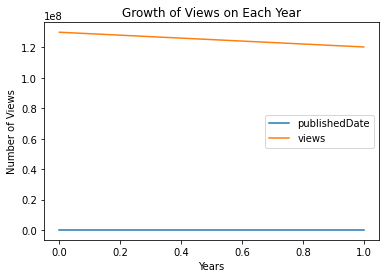

2

In [17]:
growth_of_channel = df[['publishedDate', 'views']]
growth_of_channel['publishedDate'] = pd.DatetimeIndex(growth_of_channel['publishedDate']).year
growth_of_channel = pd.DataFrame(growth_of_channel.groupby('publishedDate')['views'].sum())
growth_of_channel.reset_index(inplace=True)

growth_of_channel.plot(kind='line')

plt.title('Growth of Views on Each Year')
plt.ylabel('Number of Views')
plt.xlabel('Years')


plt.show() # need this line to show the updates made to the figure


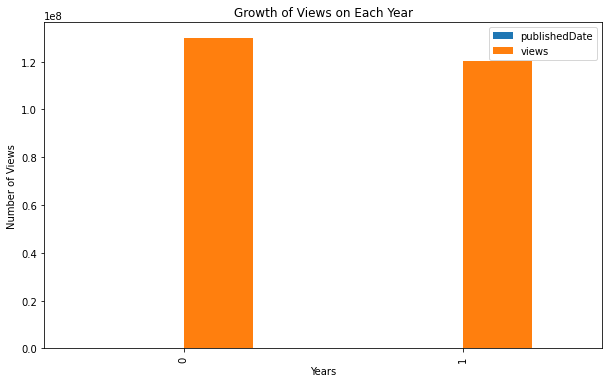

In [14]:
growth_of_channel.plot(kind='bar', figsize=(10, 6))


plt.title('Growth of Views on Each Year')
plt.ylabel('Number of Views')
plt.xlabel('Years')

plt.show()

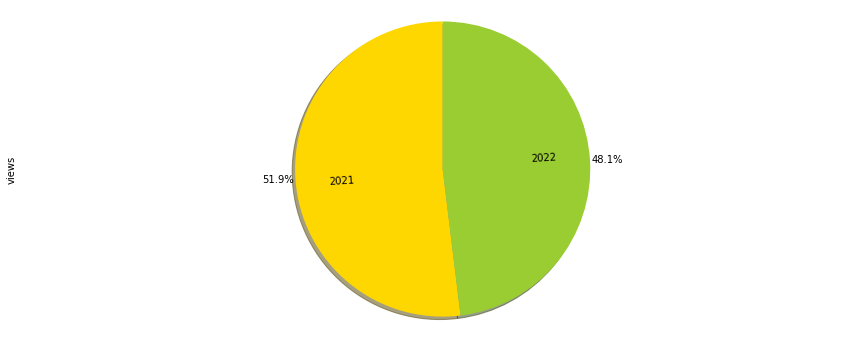

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'blue', 'orange', 'purple']



growth_of_channel['views'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=growth_of_channel['publishedDate'],         # turn off labels on pie chart
                            labeldistance=0.6,  
                            rotatelabels =True,    
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors    
                            )

plt.title('')
plt.axis("equal")

plt.show()

In [19]:
normal_views = (growth_of_channel['views'] - growth_of_channel['views'].min()) / (growth_of_channel['views'].max() - growth_of_channel['views'].min())

Text(0.5, 1.0, 'Growth of Views on Each Year')

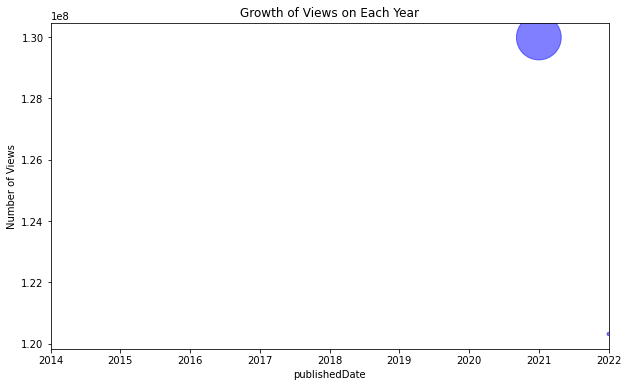

In [20]:
ax0 = growth_of_channel.plot(
    kind='scatter',
    figsize=(10,6),
    color='blue',
    s=normal_views * 2000 + 10,
    xlim=(2014, 2022),
    x='publishedDate',
    y='views',
    alpha=0.5
 )

ax0.set_ylabel('Number of Views')
ax0.set_title('Growth of Views on Each Year')

In [22]:
most_growth = df[pd.to_datetime(df['publishedDate']).dt.year == 2021]
most_growth['publishedDate'] = pd.DatetimeIndex(most_growth['publishedDate']).month
most_growth = most_growth.groupby('publishedDate').sum()
most_growth.reset_index(inplace=True)
most_growth

C:\Users\abhi0\AppData\Local\Temp\ipykernel_3068\2212723630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_growth['publishedDate'] = pd.DatetimeIndex(most_growth['publishedDate']).month


,publishedDate,views,likes,favoriteCount,comments
0,3,4573805,413093,0,1020
1,4,42448,3514,0,18
2,5,700138,48368,0,113
3,7,3659118,199018,0,480
4,8,8537180,572654,0,1587
5,9,29784363,2302406,0,24532
6,10,20557570,1509748,0,10611
7,11,24663827,1518197,0,12972
8,12,37468938,2944936,0,9977


In [23]:
most_growth.sort_values('views', ascending=False).head(10)

,publishedDate,views,likes,favoriteCount,comments
8,12,37468938,2944936,0,9977
5,9,29784363,2302406,0,24532
7,11,24663827,1518197,0,12972
6,10,20557570,1509748,0,10611
4,8,8537180,572654,0,1587
0,3,4573805,413093,0,1020
3,7,3659118,199018,0,480
2,5,700138,48368,0,113
1,4,42448,3514,0,18


In [27]:
import datetime
df.set_index('publishedDate')
df[(df['publishedDate']>datetime.date(2021,12,1)) & (df['publishedDate']<datetime.date(2021,12,31))].sort_values('views', ascending=False).head(10)

,title,publishedDate,channelName,views,likes,favoriteCount,duration,comments
549,"Jo bhi kar rahe ho, Karte hi chalo 🔥",2021-12-05,Prafull MBA CHAI WALA,5631178,459660,0,PT54S,854
515,Iske niche to nahi jaoge na? | Prafull Billore...,2021-12-25,Prafull MBA CHAI WALA,5232246,372647,0,PT19S,465
534,"Kuch bhi karo na life me, aisa karo ki tumhare...",2021-12-22,Prafull MBA CHAI WALA,4808145,444092,0,PT47S,1540
507,Fark samjhna bahut zaroori hai | Prafull Billo...,2021-12-25,Prafull MBA CHAI WALA,2976987,209311,0,PT13S,304
540,"""The importance of traveling""",2021-12-16,Prafull MBA CHAI WALA,2411830,197391,0,PT52S,567
538,"Everyone ask -""Itni mehnat kyun?"" well here's ...",2021-12-18,Prafull MBA CHAI WALA,798797,83773,0,PT1M,351
491,Patience is the key 🗝,2021-12-29,Prafull MBA CHAI WALA,720956,82544,0,PT36S,142
521,Konsa kaam chhota hota hai?| Parul University ...,2021-12-24,Prafull MBA CHAI WALA,525754,33186,0,PT5M2S,366
496,"Thik hai na yaar, chalta hai | Prafull Billore...",2021-12-26,Prafull MBA CHAI WALA,382663,38269,0,PT14S,58
545,Process of life | Prafull Billore | MBA CHAI W...,2021-12-09,Prafull MBA CHAI WALA,379490,38377,0,PT28S,196
